In [ ]:
import numpy as np
import pandas as pd
import os

import nltk
nltk.download('punkt')
#thư viện trực quan hóa
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import umap.umap_ as umap


#ngôn ngữ tự nhiên
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import gensim.downloader as api
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF - IDF

In [6]:
df=pd.read_csv("cleaned_data_1.csv")#data ban đầu đã được clean

In [7]:
df.head()

,Unnamed: 0,id,author,content,picture_count,processed,source,title,topic,url
0,0,218114,yến phương,Dịch bệnh ảnh hưởng yếu tố bất lợi lẫn doanh n...,0,1,vtv.vn,Hoạt động sản xuất Trung Quốc chậm,Kinh tế,https://vtv.vn/kinh-te/hoat-dong-san-xuat-cua-...
1,1,218113,phúc đạt,Đăng quang vị Á quân 2 - Miss International Qu...,0,1,eva.vn,"""Tiên nữ Đắk Nia"" diện áo tắm soi thấu hao hao...",Sức khỏe - Đời sống,https://eva.vn/thoi-trang-sao/tien-nu-dak-nia-...
2,2,218112,thùy linh,"Tối 31-7, ĐH Quốc gia Hà Nội gửi công văn Hiệu...",2,1,docbao.vn,Giám đốc ĐH Quốc gia Hà Nội tiếng vụ Hiệu trưở...,Xã hội,https://docbao.vn/xa-hoi/giam-doc-dh-quoc-gia-...
3,3,218110,gia miêu,Sự bé gái 8 TP.HCM dì ghẻ bạo hành tử vong 202...,1,1,thanhnien.vn,Người hàng xóm bụng,Xã hội,https://thanhnien.vn/nguoi-hang-xom-tot-bung-p...
4,4,218108,hạ mây,Theo Dailymail,5,1,kenh14,"Siêu mẫu nội y Shanina Shaik bầu ""vượt mặt"" qu...",Văn hóa - Giải trí,https://kenh14.vn/sieu-mau-noi-y-shanina-shaik...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96977 entries, 0 to 96976
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     96977 non-null  int64 
 1   id             96977 non-null  int64 
 2   author         96977 non-null  object
 3   content        96977 non-null  object
 4   picture_count  96977 non-null  int64 
 5   processed      96977 non-null  int64 
 6   source         96977 non-null  object
 7   title          96977 non-null  object
 8   topic          96977 non-null  object
 9   url            96977 non-null  object
dtypes: int64(4), object(6)
memory usage: 7.4+ MB


In [9]:
df.isnull().sum()#kiểm tra giá trị null

Unnamed: 0       0
id               0
author           0
content          0
picture_count    0
processed        0
source           0
title            0
topic            0
url              0
dtype: int64

In [10]:
dup=df.duplicated().sum()#kiểm tra giá trị trùng lặp
print(f"The dataset contains {dup} duplicates which can be easliy dropped")

The dataset contains 0 duplicates which can be easliy dropped


In [11]:
news_df= df[df['topic'] == 'Xã hội']#truy vấn topic theo chuỗi xã hội/chưa có đặt chỉ mục
news_df

,Unnamed: 0,id,author,content,picture_count,processed,source,title,topic,url
2,2,218112,thùy linh,"Tối 31-7, ĐH Quốc gia Hà Nội gửi công văn Hiệu...",2,1,docbao.vn,Giám đốc ĐH Quốc gia Hà Nội tiếng vụ Hiệu trưở...,Xã hội,https://docbao.vn/xa-hoi/giam-doc-dh-quoc-gia-...
3,3,218110,gia miêu,Sự bé gái 8 TP.HCM dì ghẻ bạo hành tử vong 202...,1,1,thanhnien.vn,Người hàng xóm bụng,Xã hội,https://thanhnien.vn/nguoi-hang-xom-tot-bung-p...
32,32,218038,nguyễn trường,"Đảo Hòn Khô trung tâm xã Nhơn Hải 500m, du lịc...",9,1,vov.vn,"Chấn chỉnh bè nổi hoạt động trái phép Hòn Khô,...",Xã hội,https://vov.vn/xa-hoi/chan-chinh-be-noi-hoat-d...
35,35,218026,huyền chi,"Tối 31/7, chuyến xe Bà Rịa - Vũng Tàu TP.HCM, ...",2,1,zingnews,Tài xế gấp rút dán thẻ thu phí dừng 'G' tốc,Xã hội,https://zingnews.vn/tai-xe-gap-rut-dan-the-thu...
45,45,218009,thành an,"Về huyện biên giới Sông Mã, sông Mã thượng đổ ...",4,1,vov.vn,60 quan hệ Việt-Lào: Nghĩa tình sắt son dòng s...,Xã hội,https://vov.vn/xa-hoi/tin-24h/60-nam-quan-he-v...
...,...,...,...,...,...,...,...,...,...,...
96948,96951,81,ttxvn,Việc rà soát đặc biệt ưu tiên đối tuyến cống c...,1,1,zingnews,TP.HCM thăm dò 'hố tử thần' đường,Xã hội,https://zingnews.vn/tphcm-tham-do-ho-tu-than-t...
96949,96952,80,ttxvn,Nội dung UBND TP.HCM gửi Bộ Kế hoạch Đầu tư. B...,1,1,zingnews,Metro 2 TP.HCM lùi thời gian khởi công 2025,Xã hội,https://zingnews.vn/metro-so-2-tphcm-lui-thoi-...
96954,96957,61,chiến thắng,"Khoảng 15h45 7/6, tài xế Nguyễn Ngọc Tuấn (40 ...",2,1,zingnews,"Xe tải nổ lốp, lật ngang tốc TP.HCM - Dầu Giây",Xã hội,https://zingnews.vn/xe-tai-no-lop-lat-ngang-tr...
96956,96959,55,ttxvn,"Tại kỳ họp bất chiều 7/6 HĐND Hà Nội, 100% đại...",2,1,zingnews,Ông Chu Ngọc Anh bãi nhiệm chức Chủ tịch UBND ...,Xã hội,https://zingnews.vn/ong-chu-ngoc-anh-bi-bai-nh...


In [12]:
news_df2 = news_df.reset_index(drop=True)#lấy data1 đặt chỉ mục
news_df2

,Unnamed: 0,id,author,content,picture_count,processed,source,title,topic,url
0,2,218112,thùy linh,"Tối 31-7, ĐH Quốc gia Hà Nội gửi công văn Hiệu...",2,1,docbao.vn,Giám đốc ĐH Quốc gia Hà Nội tiếng vụ Hiệu trưở...,Xã hội,https://docbao.vn/xa-hoi/giam-doc-dh-quoc-gia-...
1,3,218110,gia miêu,Sự bé gái 8 TP.HCM dì ghẻ bạo hành tử vong 202...,1,1,thanhnien.vn,Người hàng xóm bụng,Xã hội,https://thanhnien.vn/nguoi-hang-xom-tot-bung-p...
2,32,218038,nguyễn trường,"Đảo Hòn Khô trung tâm xã Nhơn Hải 500m, du lịc...",9,1,vov.vn,"Chấn chỉnh bè nổi hoạt động trái phép Hòn Khô,...",Xã hội,https://vov.vn/xa-hoi/chan-chinh-be-noi-hoat-d...
3,35,218026,huyền chi,"Tối 31/7, chuyến xe Bà Rịa - Vũng Tàu TP.HCM, ...",2,1,zingnews,Tài xế gấp rút dán thẻ thu phí dừng 'G' tốc,Xã hội,https://zingnews.vn/tai-xe-gap-rut-dan-the-thu...
4,45,218009,thành an,"Về huyện biên giới Sông Mã, sông Mã thượng đổ ...",4,1,vov.vn,60 quan hệ Việt-Lào: Nghĩa tình sắt son dòng s...,Xã hội,https://vov.vn/xa-hoi/tin-24h/60-nam-quan-he-v...
...,...,...,...,...,...,...,...,...,...,...
9497,96951,81,ttxvn,Việc rà soát đặc biệt ưu tiên đối tuyến cống c...,1,1,zingnews,TP.HCM thăm dò 'hố tử thần' đường,Xã hội,https://zingnews.vn/tphcm-tham-do-ho-tu-than-t...
9498,96952,80,ttxvn,Nội dung UBND TP.HCM gửi Bộ Kế hoạch Đầu tư. B...,1,1,zingnews,Metro 2 TP.HCM lùi thời gian khởi công 2025,Xã hội,https://zingnews.vn/metro-so-2-tphcm-lui-thoi-...
9499,96957,61,chiến thắng,"Khoảng 15h45 7/6, tài xế Nguyễn Ngọc Tuấn (40 ...",2,1,zingnews,"Xe tải nổ lốp, lật ngang tốc TP.HCM - Dầu Giây",Xã hội,https://zingnews.vn/xe-tai-no-lop-lat-ngang-tr...
9500,96959,55,ttxvn,"Tại kỳ họp bất chiều 7/6 HĐND Hà Nội, 100% đại...",2,1,zingnews,Ông Chu Ngọc Anh bãi nhiệm chức Chủ tịch UBND ...,Xã hội,https://zingnews.vn/ong-chu-ngoc-anh-bi-bai-nh...


In [13]:
shape=news_df2.shape#thống kê các dòng và cột trong topic có giá trị xã hội
print(f"The shape of the dataset is:", shape)

The shape of the dataset is: (9502, 10)


In [14]:
news=news_df2.source.value_counts(normalize=True, sort=False)*1000 #chuyển đối tỉ lệ % sang hệ số thập phân có ba chữ số thập phân
df_counts=news.rename_axis('page').to_frame('counts')
df_counts=df_counts.reset_index()
df_counts

,page,counts
0,docbao.vn,39.570617
1,thanhnien.vn,36.097664
2,vov.vn,110.713534
3,zingnews,72.405809
4,kenh14,53.041465
5,laodong,133.761313
6,danviet,74.721111
7,vtv.vn,91.033467
8,cafebiz,62.828878
9,dantri,108.819196


In [21]:
#Chức năng vẽ đồ thị trực quan hóa các danh mục của các bài báo
def circular_bar(df, col_name, col_counts):
# Khởi tạo hình dạng
    plt.figure(figsize=(15,20))#tọa ảnh 20x15 inch
    ax = plt.subplot(111, polar=True) # tạo và vẽ biểu đồ dạng đồng hồ cát
    plt.axis('off')#không hiển thị giá trị


# Đặt giới hạn tọa độ
    upperLimit = 100
    lowerLimit = 40

    maxi = df[col_counts].max()
    slope = (maxi - lowerLimit) / maxi
    heights = slope * df[col_counts] + lowerLimit



# độ rộng mỗi thanh
    width = 2*np.pi / len(df.index)

# Tính góc mỗi thanh được căn giữa
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    angles
# Vẽ thanh
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=1, 
        edgecolor="black",
        color="#61a4b2",
    )

# khoảng trống nhỏ giữa thanh và nhãn
    labelPadding = 4

# Thêm nhãn
    for bar, angle, height, label in zip(bars,angles, heights, df[col_name]):

    # Nhãn được xoay. Việc xoay phải được chỉ định theo độ :
        rotation = np.rad2deg(angle)

    # Lật ngược một số nhãn
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"

    # Cuối cùng thêm nhãn
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.show()

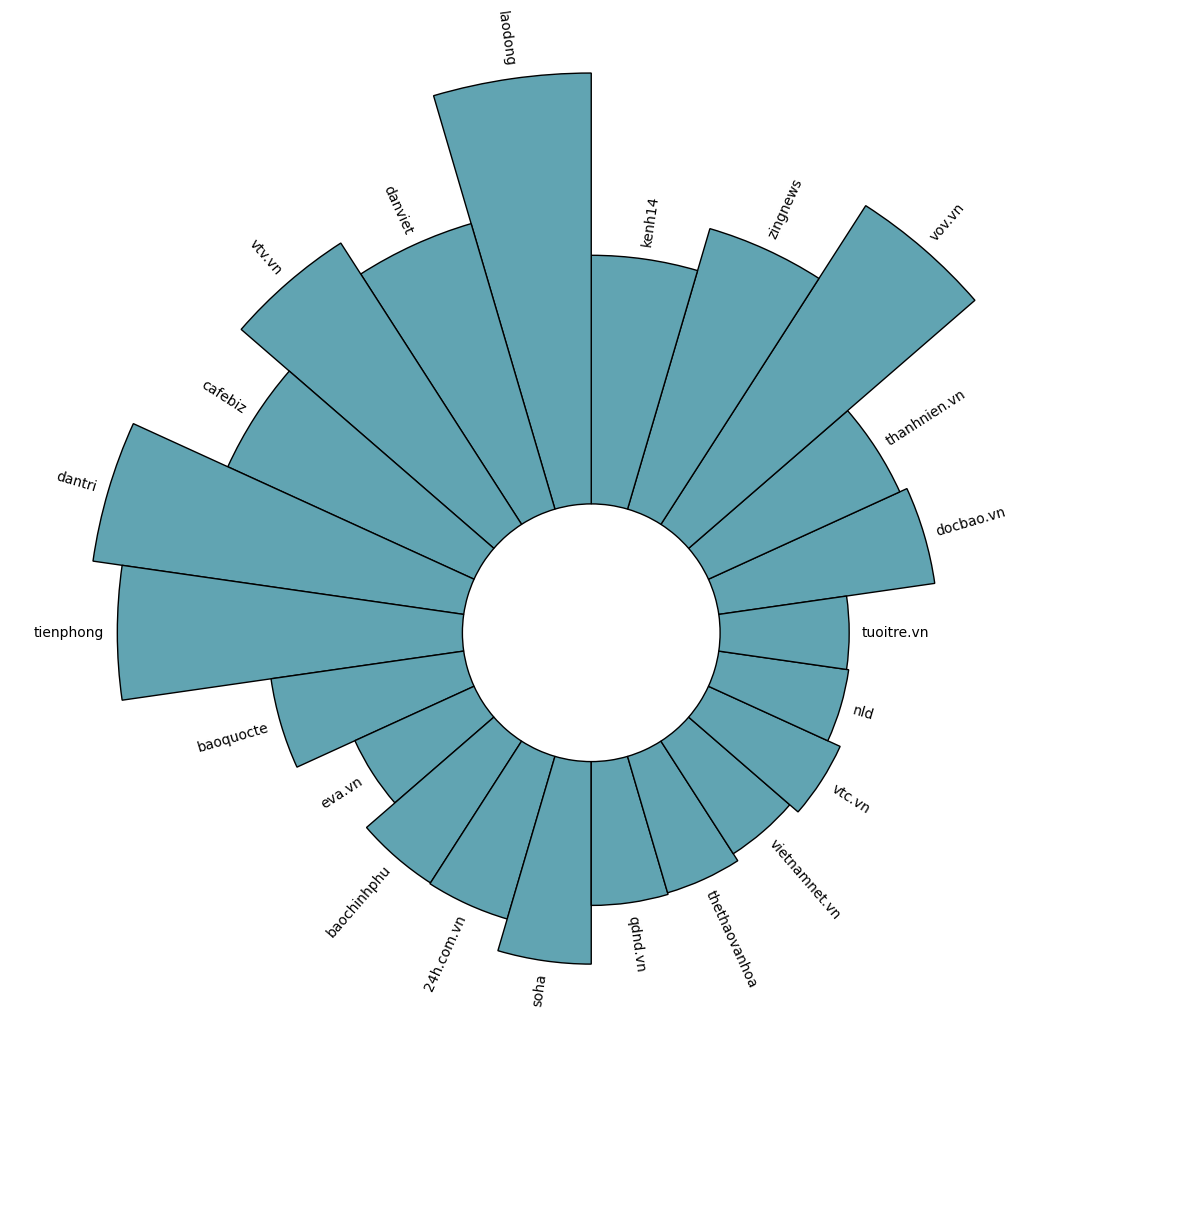

In [22]:
circular_bar(df_counts, 'page', 'counts')

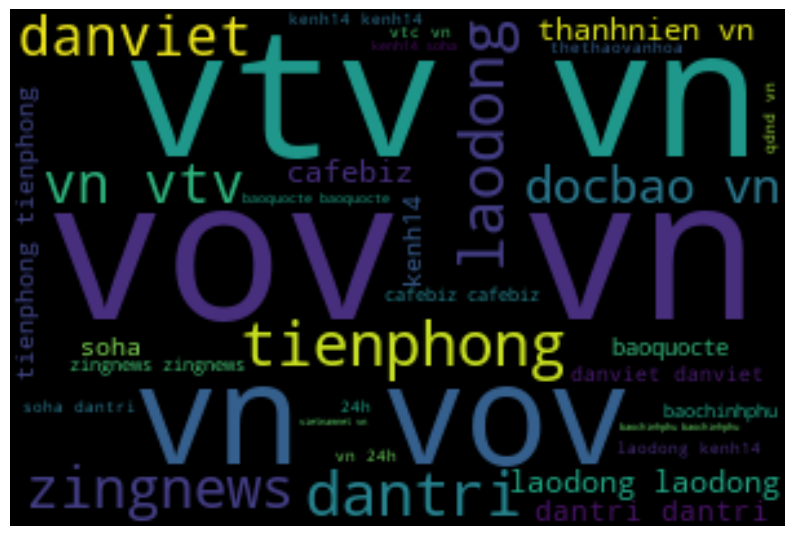

In [23]:
#Trực quan hóa đám mây từ
text=" ".join(i for i in news_df2.source)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 300, height = 200, stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
#Nối dòng tiêu đề và nội dung
news_df2["news_text"] =news_df2["title"] + " " + news_df2["content"] 

In [25]:
news_df2=news_df2.drop(columns=["Unnamed: 0", "picture_count", "processed"])

In [26]:
#Xác định hàm tiền xử lý
def process(text):
    text = re.sub("[^A-Za-z1-9 ]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    clean_list = []
    for token in tokens:
        if token not in en_stopwords:
            clean_list.append(lemmatizer.lemmatize(token))
    return " ".join(clean_list)

In [27]:
vectorizer = TfidfVectorizer()#chuyển từ sang vector(vector hóa)
features   = vectorizer.fit_transform(news_df2['news_text']) #chuyển các đối tượng sang dữ liệu đc lưu

In [28]:
#Lấy độ tương tự cosin của văn bản được vector hóa
cosine_sim = cosine_similarity(features,features) # sklearn nằm trong

In [29]:
def get_recommended(title_index, cosine_sim):
    title=news_df2.title[title_index]
    indices = pd.Series(news_df2.index, index=news_df2['title']).drop_duplicates()
    # Lấy chỉ mục của tiêu đề tin tức
    idx = indices[title]
    # Sắp xếp tiêu đề tin tức theo điểm tương đồng
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Lấy điểm cho tựa tin giống nhau nhất
    sim_scores = sim_scores[1:20]#có thể thay đổi số lượng hiển thị
    # Lấy chỉ số tiêu đề
    scores=[i[1] for i in sim_scores]
    news_indices = [i[0] for i in sim_scores]
    # Trả về top những tựa tin giống nhau nhất
    dfs=pd.DataFrame({'title': news_df2['title'].iloc[news_indices],
                'Cosine_similarity':  scores})
    print("*" * 30 + " News Recommendation " + "*" * 30)
    print("")
    print(f"News title: {title}")
    print("")
    print( "*" * 29 + " Recommended News " + "*" * 29)
    return dfs.iloc[0:,]

In [30]:
news_df2.title[22]

'Hải Phòng xử lý phương tiện chở tải 300%'

In [31]:
recommended=get_recommended(22, cosine_sim)
recommended

****************************** News Recommendation ******************************

News title: Hải Phòng xử lý phương tiện chở tải 300%

***************************** Recommended News *****************************


,title,Cosine_similarity
7197,Gần 2.700 xe tải cắt thành thùng cơi nới tuần ...,0.657866
8523,Đảng viên vi phạm nồng độ cồn lái xe gửi thông...,0.637651
4304,"Quảng Bình thu 2,5 tỷ đồng tiền phạt xử lý xe ...",0.598474
8698,"Cưỡng chế tháo, cắt thùng xe cơi nới, khổ, tải",0.592953
6119,CSGT Bắc Ninh xử lý 300 trường hợp xe tải cơi ...,0.588145
6581,Bình Thuận cường xử phạt xe tải,0.586744
6529,Thái Bình: Doanh nghiệp vận tải chấp hành hạ t...,0.572131
8228,Bình Thuận: “Mắt thần” QL1 bắt lỗi 22.000 trườ...,0.564098
3776,Công an TP Thủ Đức xử phạt 7 tỷ đồng lỗi vi ph...,0.563409
5409,Gia Lai: Hơn 400 trường hợp vi phạm nồng độ cồ...,0.561842


# W2VEC

In [32]:
from gensim.models import word2vec

In [33]:
corpus = []
for words in news_df2['news_text']:
    corpus.append(words.split())

In [34]:
#Tạo mô hình word thành vec
google_model = Word2Vec(vector_size = 300, window=5, min_count = 2, workers = -1)
google_model.build_vocab(corpus)

In [35]:
def vectors(x):
    # Tạo danh sách lưu trữ các vectơ (news_text thành vectơ)
    global word_embeddings
    word_embeddings = []
    vocab = list(google_model.wv.key_to_index)
    # Đọc từng tin_văn bản
    for line in news_df2['news_text']:
        avgword2vec = None
        count = 0
        for word in line.split():
            if word in vocab:
                count += 1
                if avgword2vec is None:
                    avgword2vec = google_model.wv.get_vector(word, norm=True) 
                else:
                    avgword2vec = avgword2vec + google_model.wv.get_vector(word, norm=True) 
                
        if avgword2vec is not None:
            avgword2vec = avgword2vec / count
        
            word_embeddings.append(avgword2vec)

In [36]:
#gọi hàm vectơ trên tập dữ liệu
vectors(news_df2)  
#tìm độ tương tự cosin cho các vectơ
cosine_similarities = cosine_similarity(word_embeddings, word_embeddings)

In [37]:
#gọi hàm recommended
w2vrecommended=get_recommended(22, cosine_similarities)
w2vrecommended

****************************** News Recommendation ******************************

News title: Hải Phòng xử lý phương tiện chở tải 300%

***************************** Recommended News *****************************


,title,Cosine_similarity
7147,"Gần 8.000 tài xế 'dính' nồng độ cồn, phạt 30 t...",0.658902
1269,Thừa Thiên Huế xử lý 4500 trường hợp vi phạm a...,0.633741
2860,"Cao bảo đảm trật tự, an toàn giao thông: Trung...",0.614052
8523,Đảng viên vi phạm nồng độ cồn lái xe gửi thông...,0.600272
8228,Bình Thuận: “Mắt thần” QL1 bắt lỗi 22.000 trườ...,0.596595
8698,"Cưỡng chế tháo, cắt thùng xe cơi nới, khổ, tải",0.591396
6529,Thái Bình: Doanh nghiệp vận tải chấp hành hạ t...,0.589998
4304,"Quảng Bình thu 2,5 tỷ đồng tiền phạt xử lý xe ...",0.583086
2917,TT-Huế xử lý 4.500 trường hợp vi phạm giao thô...,0.578461
8263,"Cần Thơ quân kiểm tra, xử lý vi phạm giao thông",0.574718
